In [1]:
import os
from matplotlib import pyplot as plt
os.environ['CUDA_VISIBLE_DEVICES'] = ''
from rover_model.reactor_net import ReactorDataSet
import tensorflow as tf

IndentationError: expected an indented block (_reactor_dataset.py, line 33)

In [2]:
dataset = ReactorDataSet(path="/home/pu/dataset/wall_crawler_train")
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())

In [3]:
coord = tf.train.Coordinator()
tf.train.start_queue_runners(coord=coord, sess=sess)
dataset.initialize(sess)
coord.request_stop()
coord.join()

In [4]:
frame = sess.run(dataset.frames[1500])

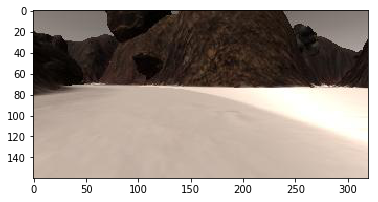

In [5]:
plt.imshow(frame)
plt.show()

In [12]:
brake = sess.run(dataset.brake)

In [15]:
angles = sess.run(dataset.steer)

In [30]:
switch = sess.run(dataset.switch)

In [32]:
switch.nonzero()

(array([3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 8480,
        8481, 8482, 8483, 8484, 8485, 8486, 8487]),)

In [43]:
brake

array([9, 0, 0, ..., 0, 0, 0], dtype=int32)

In [34]:
throttle = sess.run(dataset.throttle)

In [40]:
len(throttle.nonzero()[0])

10071

In [42]:
len(switch.nonzero()[0])

18

In [1]:
import tensorflow as tf

In [2]:
reader = tf.WholeFileReader()

In [11]:
file_queue = tf.train.string_input_producer(['frame.bin'])
dt = reader.read(file_queue)
dt = tf.decode_raw(dt, tf.uint8)
dt = tf.reshape(dt, (-1, 160, 320, 3))

In [9]:
print(tf.WholeFileReader.__init__.__doc__)

Create a WholeFileReader.

    Args:
      name: A name for the operation (optional).
    


In [12]:
dt

<tf.Tensor 'Reshape_1:0' shape=(?, 160, 320, 3) dtype=uint8>

In [6]:
coord

In [7]:
print(coord.should_stop.__doc__)

Check if stop was requested.

    Returns:
      True if a stop was requested.
    


In [2]:
import tensorflow as tf

In [3]:
q = tf.train.string_input_producer(['abc'])

In [4]:
q

In [5]:
sess = tf.Session()

In [6]:
coord = tf.train.Coordinator()
tf.train.start_queue_runners(coord=coord, sess=sess)

[<Thread(Thread-4, started daemon 140079536264960)>,
 <Thread(Thread-5, started daemon 140079527872256)>]

In [10]:
sess.run(q.dequeue())

b'abc'

In [11]:
a = tf.Variable([0, 0, 1])

In [14]:
sess.run(tf.global_variables_initializer())

In [19]:
up = tf.scatter_update(a, tf.range(3), [3, 3, 3])

In [20]:
sess.run(up)

array([3, 3, 3], dtype=int32)

In [21]:
sess.run(a)

array([3, 3, 3], dtype=int32)

In [23]:
sess.run(a[:4])

array([3, 3, 3], dtype=int32)

In [24]:
b,c, d = a

TypeError: 'Variable' object is not iterable.

In [25]:
a[0]

<tf.Tensor 'strided_slice_2:0' shape=() dtype=int32>